# 06-Transient Solutions: Derivatives
Many times in engineering, the system is not at steady state. Or in other words, the system variables are changing. We'll look at some basic methods to readily solve problems where the system is changing with time.

You should understand at the end of this discussion that if you have an expression for the derivative, you can integrate that numerically to determine the system parameters as a function of time. 

## First Example: Frictionless emptying a tank of fliud
A tank of water is draining through a 1/8 inch diameter hole in the bottom of the tank. The water level in the tank is 7 and 3/16 inches above the hole. The tank is 1 and 9/16 inch in diameter. The density of water is 1000 kg/m<sup>3</sup>. The tank is open to the atmosphere. The flow rate out of the tank is estimated by the following equation:

$$\dot{m} = \rho A \sqrt{2 g h}$$

where $\dot{m}$ is the mass flow rate, $\rho$ is the density, $A$ is the area of the hole, $g$ is the gravitational constant, and $h$ is the height of the water above the hole. This is for a frictionless hole. 

### Analytical Solution
Start with a mass balance

\begin{align}
\frac{dm}{dt} &= \dot{m}_{in} - \dot{m}_{out} \\
\frac{dm}{dt} &= 0 - \dot{m}_{out} \\
\frac{dm}{dt} &= -\rho A \sqrt{2 g h} \\
m &= \rho V \\
V &= \frac{\pi}{4} D^2 h \\
\frac{dm}{dt} &= \rho \frac{\pi}{4} D^2 \frac{dh}{dt} = -\rho A \sqrt{2 g h} \\
\frac{dh}{dt} &= -\frac{4}{\pi D^2} A \sqrt{2 g h} \\

\end{align}

###

\begin{align}
\frac{dh}{dt} &= -\frac{4}{\pi D^2} A \sqrt{2 g h} \\
\frac{dh}{\sqrt{h}} &= -\frac{4}{\pi D^2} A \sqrt{2 g} dt \\
\int \frac{dh}{\sqrt{h}} &= -\frac{4}{\pi D^2} A \sqrt{2 g} \int dt \\
2 \sqrt{h} &= -\frac{4}{\pi D^2} A \sqrt{2 g} t + C \\
h &= \left(-\frac{2}{\pi D^2} A \sqrt{2 g} t + C\right)^2 
\end{align}

With the initial condition that $h(0) = h0$ m, we can solve for $C$:

\begin{align}
h(0) &= \left(-\frac{2}{\pi D^2} A \sqrt{2 g} (0) + C\right)^2 \\
h0 &= C^2 \\
C &= \pm \sqrt{h0}
\end{align}

Thus the solution is 
\begin{align}
h(t) &= \left(-\frac{2}{\pi D^2} A \sqrt{2 g} t + \sqrt{h0}\right)^2 \\
\end{align}

```{note}
Note that the solution is not dependent on the fluid density or viscosity. Does that make sense? Or in other words, would you expect a low viscosity fluid like water to drain faster or slower than a highly viscous fluid like honey? Logic says the honey would drain slower, but the solution says it would drain at the same rate. Why is that?
```

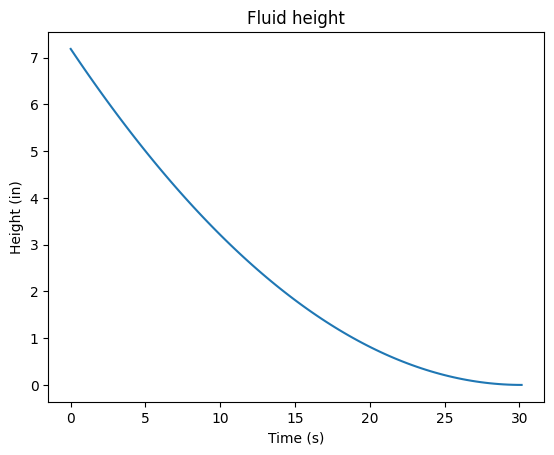

In [1]:
#Plot of the solution is:
# 1st import needed packages
import numpy as np
import matplotlib.pyplot as plt
# 2nd define constants
inch2meter = 0.0254 #m
gravity = 9.81 #m/s^2
orificeDiameter = 1/8*0.0254 #m
Area = np.pi/4*orificeDiameter**2 #exit area of the water jet, m^2
height0 = (7+3/16)*0.0254 #initial height of water in the tank, m
Dia = (1+9/16)*0.0254 #diameter of the tank, m
# 3rd determine the emptying time
emptiedTime = np.sqrt(height0)*np.pi*Dia**2/(2*Area*np.sqrt(2*gravity))
# 4th define the function for the height of the water in the tank
time = np.linspace(0, emptiedTime, 100)
def height(t):
    return (-2/(np.pi*Dia**2)*Area*np.sqrt(2*gravity)*t+np.sqrt(height0))**2

plt.plot(time, height(time)/inch2meter)
plt.title('Fluid height')
plt.xlabel('Time (s)')
plt.ylabel('Height (in)')
plt.show()


### Numerical Solution: Euler's Method
The numerical solution will use a finite difference approximation to the derivative, the simplest of which is called Euler's method. Euler's method is based on the definition of the derivative:

$$\frac{df}{dt} = \lim_{\Delta t \rightarrow 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

From the above the problem definition, we can rewrite the differential equation as:

\begin{align}
\frac{dh}{dt} = f(h) = -\frac{4}{\pi D^2} A \sqrt{2 g h} \\
\end{align}



Using Euler's method:
\begin{align}
f(t+\Delta t) &= f(t) + \frac{df}{dt} \Delta t \\
h(t+\Delta t) &= h(t) + \frac{dh}{dt} \Delta t \\
h(t+\Delta t) &= h(t) + f(h) \Delta t \\
h(t+\Delta t) &= h(t) + -\frac{4}{\pi D^2} A \sqrt{2 g h(t)} \Delta t \\
\end{align}


Now we'll use the above formulation to solve for the fluid height as a function of time. We'll also compare that solution to the analytical solution.

In [2]:
# Euler's method/solution for the height of the fluid in the tank
# 1st import needed packages
## See above
# 2nd define constants
## Use the same constants as above
# 3rd define the function for the height of the water in the tank
dt = 4 #time step
timeE = np.arange(0, 50, dt)
def derivative(height):
    if height < 0:
        return 0
    else:
        return -4/(np.pi*Dia**2)*Area*np.sqrt(2*gravity*height)
heightEuler = []
for t in timeE:
    if t == 0:
        heightEuler.append(height0)
    else:
        heightEuler.append(heightEuler[-1]+derivative(heightEuler[-1])*(timeE[1]-timeE[0]))


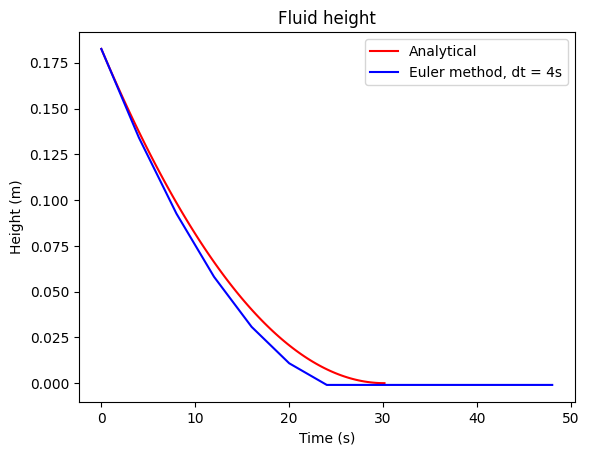

In [3]:
# 5th plot the solution
plt.plot(time, height(time),'r-', label='Analytical')
plt.plot(timeE, heightEuler, 'b-', label=f'Euler method, dt = {dt}s')
plt.title('Fluid height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend()
plt.show()

```{note}
Note: The Euler method will approach the analytical solution with smaller time steps. Try changing the time step to see how the solution changes.
```

### Numerical Solution: ODE Int (SciPy)
Euler's method isn't the best algorithm to use. There are better algorithms like 4th order Runge-Kutta. [Scipy's ODEINT](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) is used routinely for systems of differential equations. We'll use the `odeint` function from the `scipy.integrate` module to solve the same above problem with one differential equation.

In [4]:
# 1st import the needed packages
from scipy.integrate import odeint
## See above also
# 2nd define the derivative function (same as above but with time second)
def derivativeODEINT(height, time):
    if height < 0:
        return 0
    else:
        return -4/(np.pi*Dia**2)*Area*np.sqrt(2*gravity*height)
# 3rd define constants
## See above 
# 4th Use ODEINT to solve the differential equation defined by the function derivative
heightODEINT = odeint(derivativeODEINT, height0, timeE)


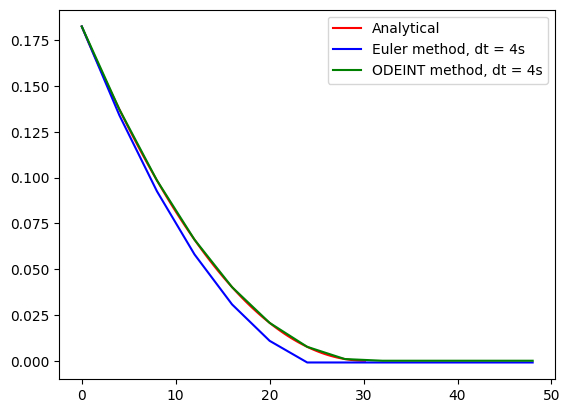

In [5]:
# 5th plot the solution
plt.plot(time, height(time),'r-', label='Analytical')
plt.plot(timeE, heightEuler, 'b-', label=f'Euler method, dt = {dt}s')
plt.plot(timeE, heightODEINT, 'g-', label=f'ODEINT method, dt = {dt}s')
plt.legend()
plt.show()

```{note}
Note: The ODEINT method is very close to analytical result even with a large delta t value. Try changing the time step to see how the solution changes.
```

## Second Example: Draining of Tank with Friction
Now we'll look at the same problem, but with friction. The flow rate out of the tank is estimated by the following equation:

\begin{align}
\dot{m} &= \rho A v = \rho A \sqrt{2 g h} C_d \\
C_d &= C_c C_v \\
\end{align}

where $\dot{m}$ is the mass flow rate, $\rho$ is the density, $A$ is the area of the hole, $g$ is the gravitational constant, $h$ is the height of the water above the hole, and $C_d$ is the discharge coefficient. $C_c$ is the coefficient of contraction and $C_v$ is the coefficient of velocity. The discharge coefficient is a dimensionless number that accounts for the frictional losses in the system. The discharge coefficient can vary depending on the geometry of the hole and the fluid viscosity.

A group from the UK and Nigeria measured nozzle discharge coefficients as published [here](https://www.sciencedirect.com/science/article/abs/pii/S0894177718314304). There, discharge coefficients are experimentally determined and compared to empirical equations like: 

\begin{align}
C_d &= \frac{Re^{5/6}}{17.11\cdot l/d + 1.65\cdot Re^{0.8}} \\
Re &= \frac{\rho D v}{\mu} \\
\end{align}

where $Re$ is the Reynolds number and $l/d$ is the length to diameter ratio of the nozzle. Solving for an analytical solution is not that easy but using the ODEINT function from the `scipy.integrate` module, we can solve the problem numerically.

In [6]:
# Define the discharge coefficient function
def dischargeCoefficient(Re,loverd):
    return Re**(5/6)/(17.11*loverd+1.65*Re**0.8)

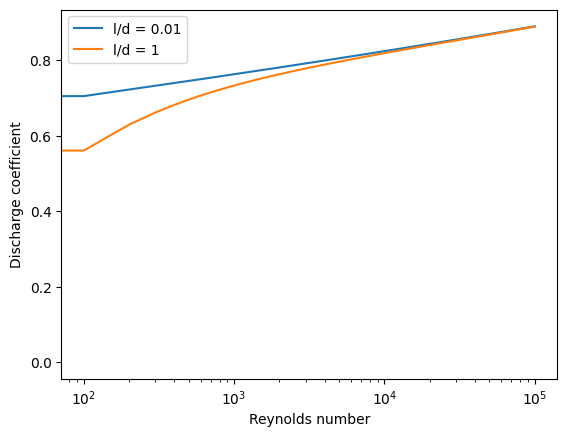

In [7]:
# We'll plot the above discharge coefficient as a function of the Reynolds number for a given
# l/d value.
Rey = np.linspace(0, 100000, 1000)
plt.plot(Rey, dischargeCoefficient(Rey, 0.01), label='l/d = 0.01')
plt.plot(Rey, dischargeCoefficient(Rey, 1), label='l/d = 1')
plt.xlabel('Reynolds number'); plt.ylabel('Discharge coefficient');plt.xscale('log'); 
plt.legend(); plt.show()

This is a complex problem as the velocity of the fluid depends on the discharge coefficient and the discharge coefficient depends on the fluid velocity. For each call to the derivative function, an fsolve is required to determine the exit velocity.

The equation to solve to determine the reynolds  number given the height of fluid in the tank is:

\begin{align}
v = \frac{\dot{m}}{\rho A} = \sqrt{2 g h} C_d(Re) \\
Re = \frac{\rho D v}{\mu} = \frac{\rho D \sqrt{2 g h} C_d(Re)}{\mu} \\
\end{align}

In [8]:
# Define a function that should equal zero to determine the Reynolds number
def ReZero(Re,loverd,rho,mu,D,g,h):
    return Re - rho*D/mu*np.sqrt(2*g*h)*dischargeCoefficient(Re, loverd)

Complete an example calculation with fsolve to find the Reynolds number given a height of fluid in the tank.

In [9]:
from scipy.optimize import fsolve
#use the args portion to pass the other variables to the function
ReN = fsolve(ReZero, 10000, args=(0.01, 1000, 1e-3, 0.01, 9.81, 1))[0]
#or you can use the lambda function (better as you can define the variables by name)
ReNL = fsolve(lambda Re: ReZero(Re, loverd=0.01, rho=1000, mu=1e-3, D=0.01, g=9.81, h=1), 10000)[0]
print(ReN,ReNL)

38157.06745192405 38157.06745192405


In [10]:
# Define fluid properties
density = 1000 #kg/m^3, water near 1000 kg/m^3 and honey near 1400 kg/m^3
visc = 1e-3 #Pa*s, water near 1e-3 Pa*s and honey near 10 Pa*s
loverdh = orificeDiameter*1 #m, the l/d ratio near 1

Now we can solve for the height of the fluid in the tank as a function of time.

In [11]:
# define the derivative function
def derivativeODEINT2(height, time):
    if height < 0:
        return 0
    else:
        #first get the Reynolds number
        Reyh = fsolve(lambda Re: ReZero(Re, loverd=loverdh, rho=density, mu=visc, D=orificeDiameter, g=gravity, h=height), 10000)[0]
        Cd = dischargeCoefficient(Reyh, loverdh)
        return -Cd*4/(np.pi*Dia**2)*Area*np.sqrt(2*gravity*height)

In [12]:
# Define constants of the tank
## See above 
# 4th Use ODEINT to solve the differential equation defined by the function derivative
heightODEINT2 = odeint(derivativeODEINT2, height0, timeE)

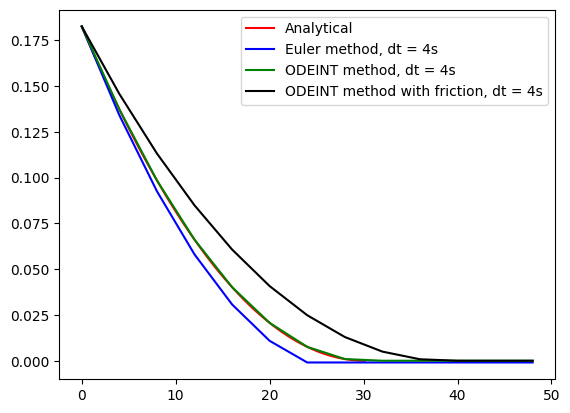

In [13]:
# 5th plot the solutions
plt.plot(time, height(time),'r-', label='Analytical')
plt.plot(timeE, heightEuler, 'b-', label=f'Euler method, dt = {dt}s')
plt.plot(timeE, heightODEINT, 'g-', label=f'ODEINT method, dt = {dt}s')
plt.plot(timeE, heightODEINT2, 'k-', label=f'ODEINT method with friction, dt = {dt}s')
plt.legend()
plt.show()

### Video of the above scenario
A video of the above scenario where water drains from graduated cylinder through a small hole. Height of the water in the cylinder as a function of time is approximated from the video.

In [14]:
from IPython.core.display import display, HTML
def video(key):
    display(HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/'+key+'" \
             frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>'))

/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_12556/3944168696.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [15]:
video('CiDzF9dKrwc')

/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [16]:
#From the experiment, the height as a function of time is approximately 
exptime = np.array([0, 0.5, 1+17/29, 2+19/29, 4+20/29, 10+17/29, 14+23/29, 18+6/29, 25, 34])
expml = np.array([250,  240, 230,      220,      200,     150,    120,     100,     70, 50])
expml = expml-40 #subtract the 40 ml of the height for the position of the orifice
# Now convert the ml value to a height with the given diameter
expheight = expml/(np.pi*Dia**2/4)/1e6

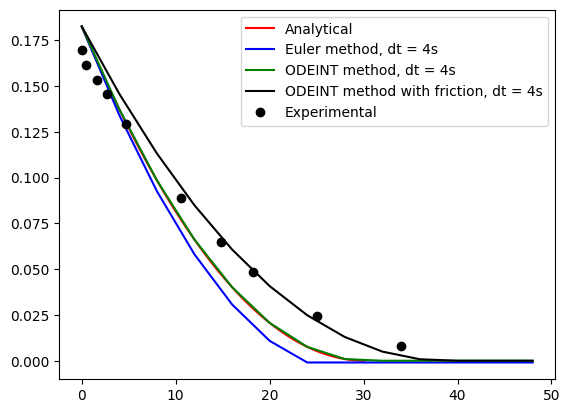

In [17]:
plt.plot(time, height(time),'r-', label='Analytical')
plt.plot(timeE, heightEuler, 'b-', label=f'Euler method, dt = {dt}s')
plt.plot(timeE, heightODEINT, 'g-', label=f'ODEINT method, dt = {dt}s')
plt.plot(timeE, heightODEINT2, 'k-', label=f'ODEINT method with friction, dt = {dt}s')
plt.plot(exptime, expheight, 'ko', label='Experimental')
plt.legend()
plt.show()

The agreement between the numerical solution including friction and the experimental values (roughly estimated from the video) is pretty good. What does that mean? What else can you conclude? How else could you use this information?